In [1]:
from datasets import load_dataset, load_from_disk

import json
import random

import numpy as np
import pandas as pd
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("LingoIITGN/ganga-2-1b")

/home/saileshpanda/miniconda3/envs/AI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("token_per_language.json", 'r') as f:
    token_per_language = json.load(f)

### Bitext Mining

Task: CrossSum

In [27]:
english_hindi = []
with open("./Data/Bitext Mining/CrossSum/english-hindi_CrossSum/english-hindi_test.jsonl", "r") as f:
    for sample in f:
        english_hindi.append(json.loads(sample))

hindi_english = []
with open("./Data/Bitext Mining/CrossSum/hindi-english_CrossSum/hindi-english_test.jsonl", "r") as f:
    for sample in f:
        hindi_english.append(json.loads(sample))

hindi_hindi = []
with open("./Data/Bitext Mining/CrossSum/hindi-hindi_CrossSum/hindi-hindi_test.jsonl", "r") as f:
    for sample in f:
        hindi_hindi.append(json.loads(sample))

english_english = []
with open("./Data/Bitext Mining/CrossSum/english-english_CrossSum/english-english_test.jsonl", "r") as f:
    for sample in f:
        english_english.append(json.loads(sample))

In [28]:
total_english_tokens = 0
total_hindi_tokens = 0

for sample in english_hindi:
    eng = tokenizer.encode(sample['text'])
    hin = tokenizer.encode(sample['summary'])

    total_english_tokens+= len(eng)
    total_hindi_tokens+= len(hin)

token_per_language['english_hindi_crosssum'] = {'Hindi': total_hindi_tokens,
                                                'English': total_english_tokens,
                                                'Romanised_Hindi': 0}

total_english_tokens = 0
total_hindi_tokens = 0
for sample in hindi_english:
    hin = tokenizer.encode(sample['text'])
    eng = tokenizer.encode(sample['summary'])

    total_english_tokens+= len(eng)
    total_hindi_tokens+= len(hin)

token_per_language['hindi_english_crosssum'] = {'Hindi': total_hindi_tokens,
                                                'English': total_english_tokens,
                                                'Romanised_Hindi': 0}

total_english_tokens = 0
total_hindi_tokens = 0
for sample in hindi_hindi:
    hin_text = tokenizer.encode(sample['text'])
    hin = tokenizer.encode(sample['summary'])

    total_hindi_tokens+= len(hin_text)
    total_hindi_tokens+= len(hin)

token_per_language['hindi_hindi_crosssum'] = {'Hindi': total_hindi_tokens,
                                                'English': 0,
                                                'Romanised_Hindi': 0}

total_english_tokens = 0
total_hindi_tokens = 0
for sample in english_english:
    english_text = tokenizer.encode(sample['text'])
    english = tokenizer.encode(sample['summary'])

    total_english_tokens+= len(english_text)
    total_english_tokens+= len(english)

token_per_language['english_english_crosssum'] = {'Hindi': 0,
                                                'English': total_english_tokens,
                                                'Romanised_Hindi': 0}

In [29]:
hindi_url = []
english_url = []

hindi_url.extend([sample['target_url'] for sample in english_hindi])
hindi_url.extend([sample['target_url'] for sample in hindi_hindi])
hindi_url.extend([sample['source_url'] for sample in hindi_hindi])
hindi_url.extend([sample['source_url'] for sample in hindi_english])

english_url.extend([sample['source_url'] for sample in english_hindi])
english_url.extend([sample['target_url'] for sample in english_english])
english_url.extend([sample['source_url'] for sample in english_english])
english_url.extend([sample['target_url'] for sample in hindi_english])

hindi_url = set(hindi_url)
english_url = set(english_url)

hindi_url_dict = {url: f"hi_{idx}" for idx, url in enumerate(hindi_url)}
english_url_dict = {url: f"en_{idx}" for idx, url in enumerate(english_url)}

In [30]:
print(len(english_hindi))
print(len(hindi_english))
print(len(hindi_hindi))
print(len(english_english))

469
469
8571
32507


In [31]:
english_english[317]

{'source_url': 'https://www.bbc.com/news/uk-england-cornwall-54689463',
 'target_url': 'https://www.bbc.com/news/uk-england-cornwall-54689463',
 'text': 'Recently, six of the metre-wide, heavy metal mines have been caught off Looe in Cornwall. Fisherman Ivan Toms said the mines are resulting in lost fishing time and are "polluting the sea". The Royal Navy says warnings were issued when the mines were placed on the seabed and it will review the compensation claims. Mr Toms said he lost a "whole day fishing" when he and his son came across two mines on Friday night. His son cut the mines free from the trawl and narrowly missed being crushed as it crashed on to the deck, he told the BBC. "It\'s not just us, the other boats are catching them." Mr Toms said fishermen have hauled up six mines in the last few weeks. Despite being inert and not containing any explosives, the mines can cause damage to the boats at sea. Mr Toms wants compensation for the damage to his boat and fishing gear and f

In [32]:
crosssum_hindi_hindi = []
summary_instruction = "निर्देश: दिए गए पाठ के लिए सबसे प्रासंगिक सारांश प्राप्त करें। पाठ:"
query_instruction = "निर्देश: किसी दिए गए सारांश के लिए सबसे प्रासंगिक पैराग्राफ़ प्राप्त करें। सारांश: "

for idx, sample in enumerate(hindi_hindi):

    if idx%2==0:
        data = {'id': f"crosssum_hindi_hindi_{hindi_url_dict[sample['target_url']]}",
                'source': summary_instruction + sample['text'],
                'target': sample['summary']}
    else:
        data = {'id': f"crosssum_hindi_hindi_{hindi_url_dict[sample['source_url']]}",
                'source': query_instruction + sample['summary'],
                'target': sample['text']}


    crosssum_hindi_hindi.append(data)

with open("Processed_data/crosssum_hindi_hindi_test.jsonl", "w", encoding="utf-8") as f:
    for sample in crosssum_hindi_hindi:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

In [33]:
hindi_english[23]

{'source_url': 'https://www.bbc.com/hindi/international-43204196',
 'target_url': 'https://www.bbc.com/news/world-middle-east-43205593',
 'text': 'जिन अधिकारियों को बर्खास्त किया गया है उनमें वायुसेना और थल सेना के आला अधिकारी शामिल हैं. इसके अलावा कई उप-मंत्रियों की भी नियुक्तियां की गई हैं. इन नए नामों में तमादुर बिंत यूसुफ़ अल-रमाह नाम की महिला उप-मंत्री भी शामिल हैं. सऊदी क्राउन प्रिंस मोहम्मद बिन सलमान सऊदी अरब में किसी महिला का उप-मंत्री बनना आम बात नहीं है. ये फ़ैसला ऐसे वक्त आया है जब यमन में सऊदी नेतृत्व में गठबंधन सेना की विद्रोहियों के साथ लड़ाई के लगभग तीन साल पूरे होने वाले हैं. यमन में सऊदी हस्तक्षेप के कारण हूथी विद्रोही देश के दक्षिण की तरफ सीमित हो गए हैं, लेकिन अभी भी वो राजधानी सना और कई इलाकों में मज़बूती से डटे हुए हैं. लगभग तीन सालों से लड़ रही सऊदी सेना का सीधा असर देश की अर्थव्यवस्था पर अतिरिक्त बोझ की शक्ल में पड़ा है. साथ ही हूथी विद्रोहियों ने देश की राजधानी रियाद पर मिसाइल दाग़ने की धमकी दी है. (बीबीसी हिन्दी के एंड्रॉएड ऐप के लिए आप यहां क्लिक कर सकते हैं. 

In [34]:
crosssum_hindi_english = []

summary_instruction = "निर्देश: दिए गए पाठ के लिए सबसे प्रासंगिक सारांश प्राप्त करें। पाठ:"
query_instruction = "Instructions: Retrieve the most relevant paragraph for a given summary. Summary: "

for idx, sample in enumerate(hindi_english):

    if idx%2==0:
        data = {'id': f"crosssum_hindi_english_{english_url_dict[sample['target_url']]}",
                'source': summary_instruction + sample['text'],
                'target': sample['summary']}
    else:
        data = {'id': f"crosssum_hindi_english_{hindi_url_dict[sample['source_url']]}",
                'source': query_instruction + sample['summary'],
                'target': sample['text']}


    crosssum_hindi_english.append(data)

with open(f"Processed_data/crosssum_hindi_english_test.jsonl", "w", encoding="utf-8") as f:
    for sample in crosssum_hindi_english:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

In [35]:
english_hindi[23]

{'source_url': 'https://www.bbc.com/news/science-environment-51019798',
 'target_url': 'https://www.bbc.com/hindi/science-51048786',
 'text': 'By Roger HarrabinBBC environment analyst The protein is produced from soil bacteria fed on hydrogen split from water by electricity. The researchers say if the electricity comes from solar and wind power, the food can be grown with near-zero greenhouse gas emissions. If their dreams are realised, it could help the world tackle many of the problems associated with farming. When I visited Solar Foods\' pilot plant on the outskirts of Helsinki last year the researchers were raising funds for expansion. Now they say they have attracted 5.5m euros of investment, and they predict – depending on the price of electricity – that their costs will roughly match those for soya production by the end of the decade - perhaps even by 2025. Lacking in taste? I ate a few grains of the precious protein flour - called Solein - and tasted nothing, which is what the 

In [36]:
crosssum_english_hindi = []

summary_instruction = "Instructions: Retrieve the most relevant summary for the given paragraph. Text: "
query_instruction = "निर्देश: किसी दिए गए सारांश के लिए सबसे प्रासंगिक पैराग्राफ़ प्राप्त करें। सारांश: "

for idx, sample in enumerate(english_hindi):

    if idx%2==0:
        data = {'id': f"crosssum_english_hindi_{hindi_url_dict[sample['target_url']]}",
                'source': summary_instruction + sample['text'],
                'target': sample['summary']}
    else:
        data = {'id': f"crosssum_english_hindi_{english_url_dict[sample['source_url']]}",
                'source': query_instruction + sample['summary'],
                'target': sample['text']}


    crosssum_english_hindi.append(data)

with open(f"Processed_data/crosssum_english_hindi_test.jsonl", "w", encoding="utf-8") as f:
    for sample in crosssum_english_hindi:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

In [37]:
length = np.array([len(tokenizer.encode(sample['text'])) for sample in english_hindi])
print(f"English article length: {length.mean()}")
length = np.array([len(tokenizer.encode(sample['summary'])) for sample in english_hindi])
print(f"Hindi summary length: {length.mean()}")
length = np.array([len(tokenizer.encode(sample['text'])) for sample in hindi_english])
print(f"Hindi article length: {length.mean()}")
length = np.array([len(tokenizer.encode(sample['summary'])) for sample in hindi_english])
print(f"English summary length: {length.mean()}")

English article length: 892.2878464818764
Hindi summary length: 33.330490405117274
Hindi article length: 604.6759061833689
English summary length: 35.498933901918974


In [38]:
crosssum_english_english = []
summary_instruction = "Instructions: Retrieve the most relevant summary from a set of options for the given paragraph. Text: "
query_instruction = "Instructions: Retrieve the most relevant paragraph from a set of options for a given summary. Summary: "

for idx, sample in enumerate(english_english):

    if idx%2==0:
        data = {'id': f"crosssum_english_english_{english_url_dict[sample['target_url']]}",
                'source': summary_instruction + sample['text'],
                'target': sample['summary']}
    else:
        data = {'id': f"crosssum_english_english_{english_url_dict[sample['source_url']]}",
                'source': query_instruction + sample['summary'],
                'target': sample['text']}


    crosssum_english_english.append(data)

with open("Processed_data/crosssum_english_english_test.jsonl", "w", encoding="utf-8") as f:
    for sample in crosssum_english_english:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

Task: Flores

In [19]:
with open("./Data/Bitext Mining/Flores/flores_hi_en_test.json", 'r') as f:
    data = json.load(f)

In [20]:
data['examples'][230]

{'source': 'जैसे-जैसे ग्रीक का ज्ञान घटता गया, पश्चिम ने खुद को अपनी ग्रीक दार्शनिक और वैज्ञानिक जड़ों से कटा हुआ पाया.',
 'target': 'As knowledge of Greek declined, the West found itself cut off from its Greek philosophical and scientific roots.',
 'lang': 'hi',
 'translation_direction': 'xxen'}

In [21]:
total_english_tokens = 0
total_hindi_tokens = 0
for sample in data['examples']:
    hindi = tokenizer.encode(sample['source'])
    english = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hindi)
    total_english_tokens+= len(english)

token_per_language['flores'] = {'Hindi': total_hindi_tokens,
                                                'English': total_english_tokens,
                                                'Romanised_Hindi': 0}

In [22]:
flores = []

hindi_instruction = "निर्देश: दिए गए हिंदी पाठ के लिए अर्थ की दृष्टि से सर्वाधिक समान अंग्रेजी पाठ प्राप्त करें। पाठ: "
english_instruction = "Instructions: Retrieve the most semantically similar Hindi text for the given English text. Text: "

for idx, sample in enumerate(data['examples']):

    if idx%2==0:
        data_ = {'id': f"flores_{idx}",
                'source': hindi_instruction + sample['source'],
                'target': sample['target']}
    else:
        data_ = {'id': f"flores_{idx}",
                'source': english_instruction + sample['target'],
                'target': sample['source']}

    flores.append(data_)

with open(f"Processed_data/flores_test.jsonl", "w", encoding="utf-8") as f:
    for sample in flores:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

In [23]:
len_of_texts = np.array([])
for sample in data['examples']:
    len_of_texts = np.append(len_of_texts, len(tokenizer.encode(sample['source'])))

In [24]:
len_of_texts.mean()

np.float64(32.42885375494071)

Task: LASER

In [25]:
english = []
with open("./Data/Bitext Mining/LASER/tatoeba.hin-eng.eng", "r") as f:
    for sample in f:
        english.append(sample)

hindi = []
with open("./Data/Bitext Mining/LASER/tatoeba.hin-eng.hin", "r") as f:
    for sample in f:
        hindi.append(sample)

length = np.array([len(tokenizer.encode(sample)) for sample in english])
print(f"Average length of english sentences: {length.mean()}")
length = np.array([len(tokenizer.encode(sample)) for sample in hindi])
print(f"Average length of hindi sentences: {length.mean()}")

Average length of english sentences: 9.642
Average length of hindi sentences: 8.965


In [26]:
hindi[0]

'मेरे दादा ओसाका के हैं।\n'

In [27]:
english[0]

'My grandfather is from Osaka.\n'

In [28]:
total_english_tokens = 0
total_hindi_tokens = 0
for idx in range(len(hindi)):
    hin = tokenizer.encode(hindi[idx])
    eng = tokenizer.encode(english[idx])

    total_hindi_tokens+= len(hin)
    total_english_tokens+= len(eng)

token_per_language['laser'] = {'Hindi': total_hindi_tokens,
                                                'English': total_english_tokens,
                                                'Romanised_Hindi': 0}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 343825, 'Romanised_Hindi': 457636},
 'discourse': {'Hindi': 877126, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865425, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 180829, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

In [29]:
laser = []

hindi_instruction = "निर्देश: दिए गए हिंदी पाठ के लिए अर्थ की दृष्टि से सर्वाधिक समान अंग्रेजी पाठ प्राप्त करें। पाठ: "
english_instruction = "Instructions: Retrieve the most semantically similar Hindi text for the given English text. Text: "

for idx, (hin, eng) in enumerate(zip(hindi, english)):

    if idx%2==0:
        data = {'id': f"laser_{idx}",
                'source': hindi_instruction + hin,
                'target': eng}
    else:
        data = {'id': f"laser_{idx}",
                'source': english_instruction + eng,
                'target': hin}

    laser.append(data)

with open(f"Processed_data/laser.jsonl", "w", encoding="utf-8") as f:

    for sample in laser:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: Mintaka

In [30]:
with open("./Data/Bitext Mining/Mintaka/mintaka_test.json", 'r') as f:
    samples = json.load(f)

In [31]:
length = np.array([len(tokenizer.encode(sample['question'])) for sample in samples])
print(f"Average length of english questions: {length.mean()}")
length = np.array([len(tokenizer.encode(sample['translations']['hi'])) for sample in samples])
print(f"Average length of hindi questions: {length.mean()}")

Average length of english questions: 18.11875
Average length of hindi questions: 15.969


In [32]:
samples[23]

{'id': '08a4f6d8',
 'question': 'Who is older, Chris Pratt or Chris Evans?',
 'translations': {'ar': 'من هو الأكبر عمرًا، كريس برات أم كريس إيفانز؟',
  'de': 'Wer ist älter, Chris Pratt oder Chris Evans?',
  'ja': '"クリス・プラットとクリス・エヴァンス、どっちが年上?"',
  'hi': 'किसकी उम्र अधिक है, क्रिस प्रेट या क्रिस इवांस?',
  'pt': 'Quem é mais velho, Chris Pratt ou Chris Evans?',
  'es': '¿Quién es mayor: Chris Pratt o Chris Evans?',
  'it': 'Chi è più grande, Chris Pratt o Chris Evans?',
  'fr': 'Qui est plus âgé : Chris Pratt ou Chris Evans ?'},
 'questionEntity': [{'name': 'Q178348',
   'entityType': 'entity',
   'label': 'Chris Evans',
   'mention': 'Chris Evans',
   'span': [29, 40]},
  {'name': 'Q503706',
   'entityType': 'entity',
   'label': 'Chris Pratt',
   'mention': 'Chris Pratt',
   'span': [14, 25]}],
 'answer': {'answerType': 'entity',
  'answer': [{'name': 'Q503706',
    'label': {'en': 'Chris Pratt',
     'ar': 'كريس برات',
     'de': 'Chris Pratt',
     'es': 'Chris Pratt',
     'fr': 'C

In [33]:
total_english_tokens = 0
total_hindi_tokens = 0
for idx in range(len(samples)):
    eng = tokenizer.encode(samples[idx]['question'])
    hin = tokenizer.encode(samples[idx]['translations']['hi'])

    total_hindi_tokens+= len(hin)
    total_english_tokens+= len(eng)

token_per_language['Mintaka'] = {'Hindi': total_hindi_tokens,
                                                'English': total_english_tokens,
                                                'Romanised_Hindi': 0}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 63876, 'English': 72475, 'Romanised_Hindi': 0},
 'discourse': {'Hindi': 877126, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865425, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 180829, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, 'En

In [34]:
mintaka = []

hindi_instruction = "निर्देश: हिंदी प्रश्न के लिए शब्दार्थ की दृष्टि से सर्वाधिक समान अंग्रेजी प्रश्न को पुनः प्राप्त करें। "
english_instruction = "Instructions: Retrieve the most semantically similar Hindi question for the English question. Question: "

for idx, sample in enumerate(samples):

    if idx%2==0:
        data = {'id': f"mintaka_{idx}",
                'source': english_instruction + sample['question'],
                'target': sample['translations']['hi']}
    else:
        data = {'id': f"mintaka_{idx}",
                'source': hindi_instruction + sample['translations']['hi'],
                'target': sample['question']}

    mintaka.append(data)

with open(f"Processed_data/mintaka_test.jsonl", "w") as f:

    for sample in mintaka:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: PHINC

In [35]:
df = pd.read_csv("./Data/Bitext Mining/PHINC/filtered_data.csv")
df.head(3)

,Sentence,English_Translation
0,@someUSER congratulations on you celebrating b...,@some users congratulate you for celebrating B...
1,@LoKarDi_RT uske liye toh bahot kuch karna pad...,"@Lokardi_ rat we should a lot more for that, b..."
2,@slimswamy yehi to hum semjhane ki koshish kar...,"@Slimswami ehi, this is what i'm expecting you..."


In [36]:
length = np.array([len(tokenizer.encode(sample)) for sample in df['Sentence']])
print(f"Average length of english questions: {length.mean()}")
length = np.array([len(tokenizer.encode(sample)) for sample in df['English_Translation']])
print(f"Average length of hindi questions: {length.mean()}")

Average length of english questions: 32.44225399780015
Average length of hindi questions: 24.490989085371012


In [37]:
df.loc[23,'Sentence']

'@GhantaGuy is rishtewaad se azaadi'

In [38]:
df.loc[23, 'English_Translation']

'@Gantagay freedom from relations'

In [39]:
total_english_tokens = 0
total_r_english_tokens = 0
for sample in df.itertuples():
    r_eng = tokenizer.encode(sample.Sentence)
    eng = tokenizer.encode(sample.English_Translation)

    total_r_english_tokens+= len(r_eng)
    total_english_tokens+= len(eng)

token_per_language['Mintaka'] = {'Hindi': 0,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877126, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865425, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 180829, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

In [40]:
phinc = []

hindi_instruction = "nirdesh: die gae romanakrt hindi paath ke lie arth kee drshti se sabase adhik samaan angrejee paath praapt karen. paath: "
english_instruction = "Instructions: Retrieve the most semantically similar romanized Hindi text for the given English text. Text: "

for idx in range(len(df)):

    if idx%2==0:
        data = {'id': f"phinc_{idx}",
                'source': hindi_instruction + df.loc[idx, 'Sentence'],
                'target': df.loc[idx, 'English_Translation']}
    else:
        data = {'id': f"phinc_{idx}",
                'source': english_instruction + df.loc[idx, 'English_Translation'],
                'target': df.loc[idx, 'Sentence']}

    phinc.append(data)

with open(f"Processed_data/phinc.jsonl", "w") as f:

    for sample in phinc:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

### Classification

Task: HindiDiscourseClassification

In [41]:
with open("./Data/Classification/HindiDiscourseClassification/discourse_dataset.json", 'r') as f:
    data = json.load(f)

In [42]:
len(data)

9968

In [43]:
length = np.array([len(tokenizer.encode(data[key]['Sentence'])) for key in data.keys()])
print(f"Average length of hindi text: {length.mean()}")

Average length of hindi text: 21.421147672552166


In [44]:
data['0']

{'Story_no': 0,
 'Sentence': 'चेहरे पर इस की आँखें बहुत अजीब थीं।',
 'Discourse Mode': 'Descriptive'}

In [45]:
data['0']

{'Story_no': 0,
 'Sentence': 'चेहरे पर इस की आँखें बहुत अजीब थीं।',
 'Discourse Mode': 'Descriptive'}

In [46]:
discourse = []
label_groups = {}

instruction = "निर्देश: दिए गए हिंदी पाठ को निम्नलिखित में से किसी एक श्रेणी में वर्गीकृत करें: 'वर्णनात्मक', 'कथात्मक', 'संवाद', 'तर्कपूर्ण', 'सूचनात्मक', या 'अन्य'। पाठ: "

for key in data.keys():
    label = data[key]["Discourse Mode"]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(data[key]["Sentence"])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        discourse.append({'id': f'discourse_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(discourse)
        
with open(f"Processed_data/discourse.jsonl", "w") as f:

    for sample in discourse:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [47]:
label_groups.keys()

dict_keys(['Descriptive', 'Narrative', 'Dialogue', 'Argumentative', 'Informative', 'Other'])

In [48]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in discourse:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['discourse'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865425, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 180829, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: Massive

In [49]:
data = []
with open("./Data/Classification/Massive/hi-IN.jsonl", 'r') as f:
    for sample in f:
        data.append(json.loads(sample))

In [50]:
len(data)

16521

In [51]:
data[2]

{'id': '2',
 'locale': 'hi-IN',
 'partition': 'train',
 'scenario': 'alarm',
 'intent': 'alarm_set',
 'utt': 'अभी से दो घंटे के लिए अलार्म लगाओ',
 'annot_utt': '[time : अभी से दो घंटे] के लिए अलार्म लगाओ',
 'worker_id': '42',
 'slot_method': [{'slot': 'time', 'method': 'translation'}],
 'judgments': [{'worker_id': '3',
   'intent_score': 1,
   'slots_score': 1,
   'grammar_score': 3,
   'spelling_score': 2,
   'language_identification': 'target'},
  {'worker_id': '42',
   'intent_score': 1,
   'slots_score': 1,
   'grammar_score': 4,
   'spelling_score': 2,
   'language_identification': 'target'},
  {'worker_id': '46',
   'intent_score': 0,
   'slots_score': 1,
   'grammar_score': 4,
   'spelling_score': 2,
   'language_identification': 'target'}]}

In [52]:
massive = []
label_groups = {}

instruction = "निर्देश: दिए गए आदेश को निम्नलिखित में से किसी एक आशय श्रेणी में वर्गीकृत करें: 'अलार्म', 'ऑडियो', 'आईओटी', 'कैलेंडर', 'प्ले', 'सामान्य', 'डेटटाइम', 'टेकअवे', 'समाचार', 'संगीत', 'मौसम', 'क्यूए', 'सामाजिक', 'सिफारिश', 'खाना पकाना', 'परिवहन', 'ईमेल', 'सूचियाँ'। पाठ: "

for item in data:
    label = item["scenario"]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item["utt"])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        massive.append({'id': f'massive_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(massive)
        
with open(f"Processed_data/massive.jsonl", "w") as f:

    for sample in massive:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [53]:
label_groups.keys()

dict_keys(['alarm', 'audio', 'iot', 'calendar', 'play', 'general', 'datetime', 'takeaway', 'news', 'music', 'weather', 'qa', 'social', 'recommendation', 'cooking', 'transport', 'email', 'lists'])

In [54]:
train_data = [sample for sample in data if sample['partition']=='train']
length = np.array([len(tokenizer.encode(sample['utt'])) for sample in train_data])
print(f"Average length of hindi text: {length.mean()}")

Average length of hindi text: 9.21747437901685


In [55]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in massive:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['massive'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 180829, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: SentimentAnalysisHindi

In [56]:
ds = load_from_disk("./Data/Classification/SentimentAnalysisHindi")

In [57]:
length = np.array([len(tokenizer.encode(sample['text'])) for sample in ds['train']])
print(f"Average length of hindi text: {length.mean()}")

Average length of hindi text: 22.835402482979575


In [58]:
ds['train'][287]

{'label': 'pos',
 'text': 'इस कैमरे से डिफरेंट मोड्स तथा ब्राइटनेस एडजस्ट करके अच्छी फोटोज ली जा सकती है।'}

In [59]:
sentiment = []
label_groups = {}

instruction = "निर्देश: दिए गए पाठ को निम्नलिखित भावना श्रेणियों में से किसी एक में वर्गीकृत करें: सकारात्मक, नकारात्मक, या तटस्थ। पाठ: "

for item in ds['train']:
    label = item["label"]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item["text"])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        sentiment.append({'id': f'sentiment_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(sentiment)
        
with open(f"Processed_data/sentiment.jsonl", "w") as f:

    for sample in sentiment:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [60]:
label_groups.keys()

dict_keys(['neg', 'pos', 'neu'])

In [61]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in sentiment:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['sentiment'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: Sentiment Analysis Joshi

In [19]:
import pandas as pd

data_csv = pd.read_csv("./Data/Classification/sent_hineng_joshi/sentiment_dataset.csv")

In [20]:
sentiment = []
label_groups = {}

instruction = "निर्देश: दिए गए पाठ को निम्नलिखित भावना श्रेणियों में से किसी एक में वर्गीकृत करें: नकारात्मक (-1), तटस्थ (0), या सकारात्मक (1)। पाठ:"

for (_,item) in data_csv.iterrows():
    label = item.iloc[1]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item.iloc[0])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        sentiment.append({'id': f'sentiment_joshi_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(sentiment)
        
with open(f"Processed_data/sentiment_joshi.jsonl", "w") as f:

    for sample in sentiment:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [21]:
sentiment[23]

{'id': 'sentiment_joshi_1',
 'source': 'निर्देश: दिए गए पाठ को निम्नलिखित भावना श्रेणियों में से किसी एक में वर्गीकृत करें: नकारात्मक (-1), तटस्थ (0), या सकारात्मक (1)। पाठ:Modi ji agar 10 sal pahle pm bane hote to aaj india ki tasbeer dusari hoti sayad india china ke barabar me hota.',
 'target': 'Salman g meri asiqi sirf tumse hai'}

In [67]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in sentiment:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_r_english_tokens+= len(hin_1)
    total_r_english_tokens+= len(hin_2)

token_per_language['sentiment_joshi'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: Sentiment Shete

In [68]:
import pandas as pd

data_csv = pd.read_csv("./Data/Classification/sent_hineng_shete/data.csv")
print(len(data_csv))
data_csv = data_csv.dropna()

7663


In [69]:
sentiment = []
label_groups = {}

instruction = "निर्देश: दिए गए पाठ को निम्नलिखित भावना श्रेणियों में से किसी एक में वर्गीकृत करें: नकारात्मक (-1), तटस्थ (0), या सकारात्मक (1)। पाठ:"
label_dict = {-1: 'neg',
              0: 'neu',
              1: 'pos'}
for (_,item) in data_csv.iterrows():
    label = label_dict[item.iloc[1]]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item.iloc[0])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        sentiment.append({'id': f'sentiment_shete_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(sentiment)
        
with open(f"Processed_data/sentiment_shete.jsonl", "w") as f:

    for sample in sentiment:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [70]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in sentiment:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_r_english_tokens+= len(hin_1)
    total_r_english_tokens+= len(hin_2)

token_per_language['sentiment_shete'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: Sentiment Review

In [22]:
import pandas as pd

data_csv = pd.read_csv("Data/Classification/sent_review/sentiment_reviews.csv")
data_csv = data_csv.dropna()

In [23]:
data_csv['sentiment'].unique()

array([ 1, -1])

In [24]:
sentiment = []
label_groups = {}

instruction = "निर्देश: दिए गए पाठ को निम्नलिखित भावना श्रेणियों में से किसी एक में वर्गीकृत करें: नकारात्मक (-1), या सकारात्मक (1)। पाठ:"

for (_,item) in data_csv.iterrows():
    label = item.iloc[1]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item.iloc[0])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        sentiment.append({'id': f'sentiment_review_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(sentiment)
        
with open(f"Processed_data/sentiment_review.jsonl", "w") as f:

    for sample in sentiment:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [74]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in sentiment:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['sentiment_review'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: Amazon Review

In [75]:
from datasets import load_dataset

ds = load_dataset("mteb/amazon_reviews_multi", "en")

In [76]:
ds['train'][2]

{'id': 'en_0311558',
 'text': "The product is junk.\n\nI received my first order of this product and it was broke so I ordered it again. The second one was broke in more places than the first. I can't blame the shipping process as it's shrink wrapped and boxed.",
 'label': 0,
 'label_text': '0'}

In [77]:
set([sample['label'] for sample in ds['train']])

{0, 1, 2, 3, 4}

In [78]:
amazon_review = []
label_groups = {}

instruction = "Instruction: Classify the sentiment of the following Amazon product review into one of the following labels:\n0 - Very Negative  \n1 - Negative \n2 - Neutral  \n3 - Positive  \n4 - Very Positive \nReview: "

for item in ds['train']:
    label = item['label']
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item['text'])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        amazon_review.append({'id': f'amazon_review_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(amazon_review)
        
with open(f"Processed_data/amazon_review.jsonl", "w") as f:

    for sample in amazon_review:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [81]:
amazon_review[23]

{'id': 'amazon_review_0',
 'source': "Instruction: Classify the sentiment of the following Amazon product review into one of the following labels:\n0 - Very Negative  \n1 - Negative \n2 - Neutral  \n3 - Positive  \n4 - Very Positive \nReview: Deceiving description -- it's NOT real leather.\n\nNOT genuine leather, it's cheap PU. Nice looking bag, however has awful, strong, chemical smell. Immediate headaches.",
 'target': 'Leaking\n\nCame leaking in package and so sticky. Smells gross also.'}

In [82]:
amazon_review_test = []
label_groups = {}

instruction = "Instruction: Classify the sentiment of the following Amazon product review into one of the following labels:\n0 - Very Negative  \n1 - Negative \n2 - Neutral  \n3 - Positive  \n4 - Very Positive \nReview: "

for item in ds['validation']:
    label = item['label']
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item['text'])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        amazon_review_test.append({'id': f'amazon_review_val{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(amazon_review_test)
        
with open(f"Processed_data/amazon_review_test.jsonl", "w") as f:

    for sample in amazon_review_test:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [83]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in amazon_review:
    eng_1 = tokenizer.encode(sample['source'])
    eng_2 = tokenizer.encode(sample['target'])

    total_english_tokens+= len(eng_1)
    total_english_tokens+= len(eng_2)

token_per_language['amazon_review'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: ABP news

In [85]:
import json
with open("Data/Classification/ABP_News/ABP_News_classification.json", "r") as f:
    abp_news = json.load(f)

In [86]:
abp_news_classification = []
label_groups = {}

instruction = "निर्देश: निम्नलिखित समाचार लेख को दिए गए श्रेणियों में से किसी एक में वर्गीकृत करें: श्रेणियाँ: gk, technology, business, entertainment, agriculture, astro, lifestyle, sports, education, states. समाचार लेख:"

for key, val in abp_news.items():
    label = val['domain']
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(val['article'])

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        abp_news_classification.append({'id': f'abp_news_classification_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(abp_news_classification)
        
with open(f"Processed_data/abp_news_classification.jsonl", "w") as f:

    for sample in abp_news_classification:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [88]:
abp_news_classification[23]

{'id': 'abp_news_classification_lifestyle',
 'source': 'निर्देश: निम्नलिखित समाचार लेख को दिए गए श्रेणियों में से किसी एक में वर्गीकृत करें: श्रेणियाँ: gk, technology, business, entertainment, agriculture, astro, lifestyle, sports, education, states. समाचार लेख:Happy Diwali 2024 Wishes: दिवाली आ गई है और हर घर जगमगा रहा है. पूजा की तैयारियां हो रही हैं और लोग मां लक्ष्मी के आगमन का इंतजार कर रहे हैं. हर साल कार्तिक माह के कृष्ण पक्ष की अमावस्या को दिवाली मनाई जाती है. दिवाली पर पूजा पाठ के साथ साथ लोग एक दूसरे को मिठाई खिलाते हैं और दिवाली की शुभकामनाएं देते हैं. अगर आप भी अपने परिवार, परिचितों और दोस्तों को दिवाली की शुभकामनाएं भेजना चाहते हैं तो यहां दिवाली के लिए कोट्स, विशेज और व्हाट्सएप संदेश दिए जा रहे हैं.\nयह भी पढ़ें:\xa0देश के लगभग 88% लोग हैं एंग्जायटी के शिकार, अगर आप भी हैं उनमें से एक तो करें ये काम\nHappy Diwali 2024 Wishes दिवाली 2024 शुभकामनाएं और संदेश\nइस दीपावली, आपके घर में लक्ष्मी का स्वागत हो, गणेश की कृपा से सभी कठिनाइयों का निवारण हो. दिवाली की मंगलमय शुभकामनाएं

In [89]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in abp_news_classification:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['abp_news_classification'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: MTOP Intent Classification

In [7]:
from mteb.tasks import MTOPIntentClassification

task = MTOPIntentClassification()
task.load_data()

In [8]:
task.dataset['hi']['train'][23]

{'id': 3232353139323338,
 'text': 'क्या ओसवाल्डो ऑनलाइन है?',
 'label': 5,
 'label_text': 'GET_AVAILABILITY'}

In [11]:
import random
import json

intent = []
label_groups = {}

instruction = "निर्देश: दिए गए पाठ को उसके उद्देश्य के आधार पर वर्गीकृत करें। पाठ: "

for item in task.dataset['hi']['train']:
    label = item["label"]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(item["text"])

drop_key = []
for key in label_groups.keys():

    if len(label_groups[key]) < 2:
        drop_key.append(key)
    

for key in label_groups.keys():

    if key not in drop_key:

        for idx, sent in enumerate(label_groups[key]):

            pos_idx = list(range(0, len(label_groups[key])))
            pos_idx.remove(idx)
            intent.append({'id': f'intent_{key}',
                            'source': instruction + sent,
                            'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(intent)
        
with open(f"Processed_data/mtop_intent.jsonl", "w") as f:

    for sample in intent:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [95]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in intent:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['intent'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: XNLI

In [96]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("mteb/xnli", "hi")

In [97]:
ds

DatasetDict({
    test: Dataset({
        features: ['premise', 'hypothesis', 'label', 'lang'],
        num_rows: 5010
    })
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'lang'],
        num_rows: 392702
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'lang'],
        num_rows: 2490
    })
})

In [98]:
ds['train'][23]

{'premise': 'खैर यह बहुत रोचक हो गया है',
 'hypothesis': 'यह बहुत ही दिलचस ् प है .',
 'label': 0,
 'lang': 'hi'}

In [ ]:
import random

xnli = []
label_groups = {}

instruction = "निर्देश: दिए गए प्रेज़म और हाइपोथेसिस के आधार पर निर्धारित करें कि संबंध 'अनुकूलन (entailment)', 'तटस्थ (neutral)', या 'विरोधाभासी (contradiction)' है। "

for idx in range(392702):
    label = ds['train'][idx]["label"]
    if label not in label_groups:
        label_groups[label] = []
    label_groups[label].append(f"आधार: {ds['train'][idx]['premise']} परिकल्पना: {ds['train'][idx]['hypothesis']} ")

for key in label_groups.keys():

    for idx, sent in enumerate(label_groups[key]):

        pos_idx = list(range(0, len(label_groups[key])))
        pos_idx.remove(idx)
        xnli.append({'id': f'xnli_{key}',
                        'source': instruction + sent,
                        'target': label_groups[key][random.choice(pos_idx)]})
        
random.shuffle(xnli)
        
with open(f"Processed_data/xnli.jsonl", "w") as f:

    for sample in xnli:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [58]:
xnli[1]

{'id': 'xnli_2',
 'source': "निर्देश: दिए गए प्रेज़म और हाइपोथेसिस के आधार पर निर्धारित करें कि संबंध 'अनुकूलन (entailment)', 'तटस्थ (neutral)', या 'विरोधाभासी (contradiction)' है। आधार: आदमी को तुरंत मर जाना चाहिए . परिकल्पना: आदमी पूरी तरह से ठीक था . ",
 'target': 'आधार: अधिक लिंक पर क ् लिक करें ( दायें-हाथ के नीचे की ओर ) , और से परिकल्पना: विविध के अंतर ् गत क ् लिक करने के लिए कोई लिंक नहीं है . '}

In [60]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in xnli:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['xnli'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 129183,
  'English': 3931068,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 2737249,
  'English': 142367,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 47993978,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 200745412,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 31515, 'English': 32821, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 343825, 'Romanised_Hindi': 457636},
 'discourse': {'Hindi': 877126, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865425, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 180829, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi'

Task: ai4bharat/samanantar

In [15]:
from datasets import load_dataset

data = {}

for language in ['as', 'bn', 'gu', 'hi', 'kn', 'ml', 'mr', 'or', 'pa', 'ta', 'te']:
    data[language] = load_dataset("ai4bharat/samanantar", language)

In [16]:
ds_as = load_dataset("ai4bharat/samanantar", "as")
ds_bn = load_dataset("ai4bharat/samanantar", "bn")
ds_gu = load_dataset("ai4bharat/samanantar", "gu")
ds_hi = load_dataset("ai4bharat/samanantar", "hi")
ds_kn = load_dataset("ai4bharat/samanantar", "kn")
ds_ml = load_dataset("ai4bharat/samanantar", "ml")
ds_mr = load_dataset("ai4bharat/samanantar", "mr")
ds_or = load_dataset("ai4bharat/samanantar", "or")
ds_pa = load_dataset("ai4bharat/samanantar", "pa")
ds_ta = load_dataset("ai4bharat/samanantar", "ta")
ds_te = load_dataset("ai4bharat/samanantar", "te")

In [17]:
data['as']['train'][0]

{'idx': 0, 'src': 'Tie up long hair.', 'tgt': 'মেলি থোৱা দীঘল চুলি।'}

In [18]:
import random

language_classification = []

instruction = "निर्देश: दिए गए पाठ की भाषा को निम्नलिखित भाषाओं में से किसी एक के रूप में वर्गीकृत करें: असमिया (as), बांग्ला (bn), गुजराती (gu), हिंदी (hi), कन्नड़ (kn), मलयालम (ml), मराठी (mr), उड़िया (or), पंजाबी (pa), तमिल (ta), या तेलुगू (te)। पाठ: "

for key in ['as', 'bn', 'gu', 'hi', 'kn', 'ml', 'mr', 'or', 'pa', 'ta', 'te']:

    for idx, sent in enumerate(data[key]['train']):

        if key=='hi' and idx>5000:
            break
        elif key!='hi' and idx>500:
            break

        language_classification.append({'id': f'samanantar_{key}',
                        'source': instruction + sent['tgt'],
                        'target': data[key]['train'][data[key]['train'].num_rows-1-idx]['tgt']})
        
random.shuffle(language_classification)
        
with open(f"Processed_data/samanantar_language_classification.jsonl", "w") as f:

    for sample in language_classification:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

### Translation

Task: Code Mixed

In [99]:
import pandas as pd

data_csv = pd.read_csv("Data/Translation/codemixed_parallel_corpus/English-Hindi code-mixed parallel corpus.csv")
data_csv = data_csv.dropna()

In [100]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in data_csv.itertuples():
    hin_r = tokenizer.encode(sample.Sentence)
    english = tokenizer.encode(sample.English_Translation)

    total_r_english_tokens+= len(hin_r)
    total_english_tokens+= len(english)

token_per_language['code_mixed'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

In [102]:
code_mixed = []
hindi_instruction = "Nirdesh: Diye gaye Hindi vaakya se sabse saman romanised hindi vaakya dhunde. Vaakya: "
english_instruction = "Instruction: Find the most similar hindi sentence to the given romanised hindi sentence. Sentence: "

def remove_username(sentence):

    return " ".join([word for word in sentence.split() if word[0]!='@'])

for (idx, sample) in data_csv.iterrows():


    if idx%2==0:
        data = {'id': f"code_mixed_{idx}",
                'source': hindi_instruction + remove_username(sample.iloc[0]),
                'target': remove_username(sample.iloc[1])}
    else:
        data = {'id': f"code_mixed_{idx}",
                'source': english_instruction + remove_username(sample.iloc[1]),
                'target': remove_username(sample.iloc[0])}


    code_mixed.append(data)

with open("Processed_data/code_mixed.jsonl", "w", encoding="utf-8") as f:
    for sample in code_mixed:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

Task: HinGE

In [104]:
import pandas as pd
import re

data_csv = pd.read_csv("Data/Translation/HinGE/HinGE.csv")
data_csv = data_csv.dropna()

In [105]:
data_csv.head(3)

,English,Hindi,Human-generated Hinglish,WAC,WAC rating1,WAC rating2,PAC,PAC rating1,PAC rating2
0,It was presented to the Legislative Council in...,इसे 1856 में विधायी परिषद के समक्ष प्रस्तुत कि...,['Ise 1856 mein legislative council ke samaksh...,ise 1856 men legislative council ke samaksh pr...,9,6,ise 1856 men legislative council ke samaksh pr...,9,8
1,"In the year 1985-86, the erstwhile Ministry of...",वर्ष 1985-86 में पूर्ववर्ती कल्याण मंत्रालय को...,"['In the year 1985-86, purvarti kalyan mantral...",year 1985-86 men poorvavarti welfare ministry ...,10,4,year 1985-86 men poorvavarti kalyan mntralay k...,10,10
2,"Connecting to the server, please wait...","सर्वर से कनेक्ट कर रहा है, कृपया इंतजार करें...","['Connecting to the server, kripya intezaar ka...","server se kanekt kar raha hai , wait intjar karen",5,5,"server se connecting kar raha hai, kripya wait...",9,9


In [106]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in data_csv.itertuples():
    hindi = tokenizer.encode(sample.Hindi)
    english = tokenizer.encode(sample.English)

    total_hindi_tokens+= len(hindi)
    total_english_tokens+= len(english)

token_per_language['hinge'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

In [107]:
hinge = []
englishr_instruction = "Instruction: From the given English sentence, find the translated romanised Hindi sentence. Sentence: "
hindi_instruction = "निर्देश: दिए गए हिंदी वाक्य में से अनुवादित रोमनकृत हिंदी वाक्य चुनिए। वाक्य: "
hindir_instruction = "Nirdesh: Diye gaye romanised hindi vaakya se sabse saman hindi vaakya dhunde. Vaakya: "
hindire_instruction = "Nirdesh: Diye gaye romanised hindi vaakya se sabse saman english vaakya dhunde. Vaakya: "


for (idx, sample) in data_csv.iterrows():

    if len(re.findall(r"'(.*?)'", sample.iloc[2]))==0:
        continue
    if idx%2==0:
        data1 = {'id': f"hinge_{idx}",
                'source': hindi_instruction + sample.iloc[1],
                'target': re.findall(r"'(.*?)'", sample.iloc[2])[0]}
        hinge.append(data1)
        data2 = {'id': f"hinge_{idx}",
                'source': hindir_instruction + re.findall(r"'(.*?)'", sample.iloc[2])[0],
                'target': sample.iloc[1]}
        hinge.append(data2)

    else:
        data1 = {'id': f"hinge_{idx}",
                'source': hindire_instruction + re.findall(r"'(.*?)'", sample.iloc[2])[0],
                'target': sample.iloc[1]}
        hinge.append(data1)
        data2 = {'id': f"hinge_{idx}",
                'source': englishr_instruction + sample.iloc[0],
                'target': re.findall(r"'(.*?)'", sample.iloc[2])[0]}
        hinge.append(data2)
    


    hinge.append(data)

with open("Processed_data/hinge.jsonl", "w", encoding="utf-8") as f:
    for sample in hinge:
        json.dump(sample, f, ensure_ascii=False)
        f.write("\n")

In [108]:
len(hinge)

5925

### Retrieval

Task: IndicQA

In [109]:
with open("./Data/Retrieval/IndicQA/indicqa.hi.json", 'r') as f:
    data = json.load(f)

In [110]:
data['data'][3]

{'title': '',
 'paragraphs': [{'context': '1 और 2 शताब्दी के दौरान दक्षिणी भारत के चेरस, चोल और पांडिओं के रोमन मिस्र और तमिल राज्यों के बीच विकसित गहन व्यापार संबंध थे। ऊपर इंडोनेशियाई लोगों की तरह, पश्चिमी नाविकों ने समुद्र पार करने के लिए मानसून का इस्तेमाल किया एरिथ्रेअन सागर के पेरिप्लस के अज्ञात लेखक इस मार्ग का वर्णन करता है, साथ ही साथ वस्तुओं के अफ्रीका और भारत लगभग 1 सीई के किनारे पर विभिन्न वाणिज्यिक बंदरगाहों के साथ व्यापार किया गया था। इन व्यापारिक बस्तियों में लाल सागर तट पर मोसीलोन और ओपन थे। प्रशांत महासागर के विपरीत जहां पॉलिनेशिया की सभ्यता दूर-दूर तक द्वीपों और एटोल पर पहुंच गई थी और उनसे आबादी हुई थी, औपनिवेशिक काल तक लगभग सभी द्वीपों, आर्चिपेलॅगो और हिंद महासागर के एंटोल्स निर्जन थे। यद्यपि एशिया के तटीय राज्यों और अफ्रीका के कुछ हिस्सों में कई प्राचीन सभ्यताएं थीं, लेकिन मालदीव केंद्रीय भारतीय महासागर क्षेत्र में एकमात्र द्वीप समूह थे जहां एक प्राचीन सभ्यता विकसित हुई थी। मालदीव के जहाजों ने पास के तटों की यात्रा करने के लिए भारतीय मॉनसून चालू का इस्तेमाल किया। 14

In [111]:
context_list = set([sample['paragraphs'][0]['context'] for sample in data['data']])
context_dict = {context: idx for idx, context in enumerate(context_list)}

In [112]:
data['data'][34]['paragraphs'][0]['qas']

[{'id': 192,
  'category': 'NO',
  'question': 'पुराणों के अनुसार नंद वंश को किसके वंश में गिना जाता था?',
  'answers': [{'text': '', 'answer_start': None}]},
 {'id': 193,
  'category': 'SHORT',
  'question': 'नंदवंश के राजा किस वर्ण से संबंधित थे?',
  'answers': [{'text': 'न्यायी क्षत्रिय', 'answer_start': 667}]},
 {'id': 194,
  'category': 'SHORT',
  'question': 'नंद सेना में कितने घुड़सवार थे?',
  'answers': [{'text': '20 हजार ', 'answer_start': 1175}]},
 {'id': 195,
  'category': 'SHORT',
  'question': 'नंद सेना में कितने पैदल सैनिक थे?',
  'answers': [{'text': 'दो लाख पैदल', 'answer_start': 1162}]},
 {'id': 196,
  'category': 'SHORT',
  'question': 'किन ग्रंथों से पता चलता है कि महापद्मानंद की रानी बहुत सुंदर थी?',
  'answers': [{'text': 'जैन और बौद्ध ग्रंथों', 'answer_start': 41}]}]

In [113]:
indicqa = []

instruction = "निर्देश: दिए गए प्रश्न के आधार पर उपलब्ध विकल्पों में से सबसे प्रासंगिक गद्यांश चुनिए। प्रश्न: "

for sample in data['data']:

    
    context = sample['paragraphs'][0]['context']

    for qas in sample['paragraphs'][0]['qas']:

        if qas['category'] == 'No':
            continue
        indicqa.append({
            'id': f"indicqa_{context_dict[context]}",
            'source': instruction + qas['question'],
            'target': context
        })

random.shuffle(indicqa)

with open(f"Processed_data/indicqa.jsonl", "w") as f:

    for sample in indicqa:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [114]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in indicqa:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['indicqa'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 5932809, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: MLDR

In [115]:
data = []
with open("./Data/Retrieval/MLDR/test.jsonl", "r") as f:

    for sample in f:
        data.append(json.loads(sample))

In [116]:
positive_passage = []
negative_passage = []

for sample in data:
    for pp in sample['positive_passages']:
        positive_passage.append(pp['text'])
    for np in sample['negative_passages']:
        negative_passage.append(np['text'])

positive_passage = set(positive_passage)
negative_passage = set(negative_passage)

pp_dict = {passage: idx for idx, passage in enumerate(positive_passage)}

In [117]:
data[0]

{'query_id': 'q-hi-1',
 'query': 'आप कृपया बताएं, जब आप कहते हैं "विशुद्ध शस्त्र", तो आप किस अर्थ में इस्तेमाल कर रहे हैं?',
 'positive_passages': [{'docid': 'doc-hi-8',
   'text': "शब्दकोश\nपुनर्निर्देशित हिन्दू धर्म की शब्दावली \n\nशब्दकोश (अन्य वर्तनी: शब्दकोष) एक बडी सूची या ऐसा ग्रन्थ जिसमें शब्दों की वर्तनी, उनकी व्युत्पत्ति, व्याकरणनिर्देश, अर्थ, परिभाषा, प्रयोग और पदार्थ आदि का सन्निवेश हो। शब्दकोश एकभाषीय हो सकते हैं, द्विभाषिक हो सकते हैं या बहुभाषिक हो सकते हैं। अधिकतर शब्दकोशों में शब्दों के उच्चारण के लिये भी व्यवस्था होती है, जैसे - अन्तरराष्ट्रीय ध्वन्यात्मक लिपि में, देवनागरी में या आडियो संचिका के रूप में। कुछ शब्दकोशों में चित्रों का सहारा भी लिया जाता है। अलग-अलग कार्य-क्षेत्रों के लिये अलग-अलग शब्दकोश हो सकते हैं; जैसे - विज्ञान शब्दकोश, चिकित्सा शब्दकोश, विधिक (कानूनी) शब्दकोश, गणित का शब्दकोश आदि।\n\nसभ्यता और संस्कृति के उदय से ही मानव जान गया था कि भाव के सही सम्प्रेषण के लिए सही अभिव्यक्ति आवश्यक है। सही अभिव्यक्ति के लिए सही शब्द का चयन आवश्यक है। सही शब्द के 

In [118]:
mldr = []

instruction = "निर्देश: दिए गए प्रश्न के आधार पर उपलब्ध विकल्पों में से सबसे प्रासंगिक अनुच्छेद को चुनें। प्रश्न: "

for sample in data:

    passage = sample['positive_passages'][0]['text']
    query = sample['query']

    mldr.append({
        'id': f"mldir_{pp_dict[passage]}",
        'source': instruction + query,
        'target': passage
    })

random.shuffle(mldr)

with open(f"Processed_data/mldr_test.jsonl", "w") as f:

    for sample in mldr:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [119]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in mldr:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['mldr'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 1175819, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: MLQA

In [120]:
with open("./Data/Retrieval/MLQA_V1/test/test-context-en-question-hi.json", "r") as f:
    hin_eng_data = json.load(f)
with open("./Data/Retrieval/MLQA_V1/test/test-context-hi-question-en.json", "r") as f:
    eng_hin_data = json.load(f)
with open("./Data/Retrieval/MLQA_V1/test/test-context-hi-question-hi.json", "r") as f:
    hin_hin_data = json.load(f)

In [121]:
hindi_context = []
english_context = []

for topic in hin_hin_data['data']:
    
    for sample in topic['paragraphs']:
        hindi_context.append(sample['context'])

hindi_context = set(hindi_context)

hindi_context_dict = {passage: idx for idx, passage in enumerate(hindi_context)}

In [122]:
mlqa = []

instruction = "निर्देश: प्रश्न के आधार पर उपलब्ध विकल्पों में से सबसे प्रासंगिक संदर्भ प्राप्त करें। प्रश्न:"

for topic in hin_hin_data['data']:

    for sample in topic['paragraphs']:

        context = sample['context']

        for qas in sample['qas']:
            mlqa.append({
                'id': f"mlqa_{hindi_context_dict[context]}",
                'source': instruction + qas['question'],
                'target': context               
            })

random.shuffle(mlqa)
with open("./Processed_data/mlqa_test.jsonl", "w") as f:

    for sample in mlqa:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [123]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in mlqa:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['mlqa'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 1175819, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: ABP news

In [124]:
import json
with open("Data/Retrieval/ABP_news/ABP_new_query_doc.json", "r") as f:
    query_doc = json.load(f)

In [125]:
abp = []

instruction = "निर्देश: प्रश्न के आधार पर उपलब्ध विकल्पों में से सबसे प्रासंगिक समाचार लेख ढूंढें। प्रश्न:"
count = 0

for field in query_doc.keys():

    for idx, sample in enumerate(query_doc[field]):

        context = sample[0]
        question = sample[1]

        if question is None:
            count+=1
            continue

        abp.append({
            'id': f"abp_{field}_{idx}",
            'source': instruction + question,
            'target': context          
        })

random.shuffle(abp)
with open("./Processed_data/abp_news.jsonl", "w") as f:

    for sample in abp:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [126]:
abp[23]

{'id': 'abp_lifestyle_342',
 'source': 'निर्देश: प्रश्न के आधार पर उपलब्ध विकल्पों में से सबसे प्रासंगिक समाचार लेख ढूंढें। प्रश्न:मोक्षदा एकादशी 2024 में किस तिथि और दिन को मनाई जाएगी??',
 'target': 'Mokshada Ekadashi 2024:\xa0पंचाग (Panchang) के अनुसार मार्गशीर्ष महीने के शुक्ल पक्ष में पड़ने वाली एकादशी तिथि को मोक्षदा एकादशी के नाम से जाना जाता है. इस दिन भगवान श्रीहरि (Vishnu ji) की पूजा और व्रत करने वाले जातकों से भगवान प्रसन्न होते हैं और व्यक्ति को पापों व कष्टों से मुक्ति मिलती है. मोक्षदा एकादशी पर श्रीहरि के चतुर्भुज स्वरूप की पूजा का महत्व है.\nइस वर्ष 2024 में मोक्षदा एकादशी का व्रत बुधवार 11 दिसंबर को रखा जाएगा. वहीं अगले दिन 12 दिसंबर को व्रत का पारण किया जाएगा. शास्त्रों में मोक्षदा एकादशी व्रत के पूजा और महत्व के बारे में बताया गया है. विशेष रूप से इस एकादशी को मोक्ष प्राप्ति के लिए श्रेष्ठ माना जाता है.\nमोक्षदा एकादशी व्रत का महत्व (Mokshada Ekadashi Significance)\nमोक्षदा एकादशी पर भगवान विष्णु (Lord Vishnu) के साथ ही भगवान श्रीकृष्ण (Lord Krishna) की अराधना भी की ज

In [127]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in abp:
    hin_1 = tokenizer.encode(sample['source'])
    hin_2 = tokenizer.encode(sample['target'])

    total_hindi_tokens+= len(hin_1)
    total_hindi_tokens+= len(hin_2)

token_per_language['abp'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 1175819, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

Task: SQuAD

In [128]:
from datasets import load_dataset

ds = load_dataset("rajpurkar/squad")

In [129]:
ds['train'][2]

{'id': '5733be284776f41900661180',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'The Basilica of the Sacred heart at Notre Dame is beside to which structure?',
 'answers': {'text': ['the Main Building'], 'answer_start': [279]}}

In [130]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for idx in range(len(ds['train'])):
    context = tokenizer.encode(ds['train'][idx]['context'])
    qs = tokenizer.encode(ds['train'][idx]['question'])

    total_english_tokens+= len(context)
    total_english_tokens+= len(qs)

token_per_language['squad'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 1175819, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

In [131]:
squad = []

instruction = "Instruction: Given a question, retrieve the most relevant passage. Question: "
count = 0

for idx in range(len(ds['train'])):

    context = ds['train'][idx]['context']
    question = ds['train'][idx]['question']

    squad.append({
        'id': f"squad_{idx}",
        'source': instruction + question,
        'target': context          
    })

random.shuffle(squad)
with open("./Processed_data/squad.jsonl", "w") as f:

    for sample in squad:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [132]:
squad = []

instruction = "Instruction: Given a question, retrieve the most relevant passage. Question: "
count = 0

for idx in range(len(ds['validation'])):

    context = ds['validation'][idx]['context']
    question = ds['validation'][idx]['question']

    squad.append({
        'id': f"squad_{idx}",
        'source': instruction + question,
        'target': context          
    })

random.shuffle(squad)
with open("./Processed_data/squad_test.jsonl", "w") as f:

    for sample in squad:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: ELI5

In [133]:
from datasets import load_dataset

ds = load_dataset("sentence-transformers/eli5")

In [134]:
ds['train'][23]

{'question': "Why has the Mars Rover Opportunity's Lithium Ion Battery Lasted 11+ Years and the one in My Cell Phone/Laptop/Tablet Dies in Less Than 2?",
 'answer': 'NASA requirements lean toward the \'overengineered\' side (for good reason - if something goes wrong you can\'t replace it). The battery in your phone is more from the "make it cheaper, they can always buy another battery" school of engineering. (Just to clarify, I am not being cynical about phone/laptop batteries. Most people - me included - would rather not pay something like 100 times as much for a battery that is able to withstand operating on Mars and lasts several times longer.)'}

In [135]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for idx in range(len(ds['train'])):
    answer = tokenizer.encode(ds['train'][idx]['answer'])
    qs = tokenizer.encode(ds['train'][idx]['question'])

    total_english_tokens+= len(answer)
    total_english_tokens+= len(qs)

token_per_language['eli5'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}
token_per_language

{'english_hindi_crosssum': {'Hindi': 15632,
  'English': 418483,
  'Romanised_Hindi': 0},
 'hindi_english_crosssum': {'Hindi': 283593,
  'English': 16649,
  'Romanised_Hindi': 0},
 'hindi_hindi_crosssum': {'Hindi': 5423345,
  'English': 0,
  'Romanised_Hindi': 0},
 'english_english_crosssum': {'Hindi': 0,
  'English': 24667255,
  'Romanised_Hindi': 0},
 'flores': {'Hindi': 32818, 'English': 34399, 'Romanised_Hindi': 0},
 'laser': {'Hindi': 8965, 'English': 9642, 'Romanised_Hindi': 0},
 'Mintaka': {'Hindi': 0, 'English': 289459, 'Romanised_Hindi': 383435},
 'discourse': {'Hindi': 877773, 'English': 0, 'Romanised_Hindi': 0},
 'massive': {'Hindi': 1865198, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment': {'Hindi': 179859, 'English': 0, 'Romanised_Hindi': 0},
 'indicqa': {'Hindi': 1068905, 'English': 0, 'Romanised_Hindi': 0},
 'mldr': {'Hindi': 1175819, 'English': 0, 'Romanised_Hindi': 0},
 'mlqa': {'Hindi': 1240305, 'English': 0, 'Romanised_Hindi': 0},
 'sentiment_joshi': {'Hindi': 0, '

In [136]:
eli5 = []

instruction = "Instruction: Given a question, retrieve the most relevant answer. Question: "
count = 0

for idx in range(len(ds['train'])):

    answer = ds['train'][idx]['answer']
    question = ds['train'][idx]['question']

    eli5.append({
        'id': f"eli5_{idx}",
        'source': instruction + question,
        'target': answer          
    })

random.shuffle(eli5)
with open("./Processed_data/eli5.jsonl", "w") as f:

    for sample in eli5:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

### Reranking

Task: Stackover flow

In [137]:
from datasets import load_dataset

ds = load_dataset("mteb/stackoverflowdupquestions-reranking")

In [138]:
total_english_tokens = 0
total_r_english_tokens = 0
total_hindi_tokens = 0
for sample in ds['train']:
    query = tokenizer.encode(sample['query'])
    positive = tokenizer.encode(sample['positive'][0])

    total_english_tokens+= len(query)
    total_english_tokens+= len(positive)

token_per_language['stackoverflow'] = {'Hindi': total_hindi_tokens,
                                'English': total_english_tokens,
                                'Romanised_Hindi': total_r_english_tokens}

In [139]:
ds['train']

Dataset({
    features: ['query', 'positive', 'negative'],
    num_rows: 19847
})

In [140]:
stackoverflow = []

instruction = "Instruction: Given a query, retrieve the most similar sentence. Query: "
count = 0

for idx in range(len(ds['train'])):

    answer = ds['train'][idx]['positive'][0]
    question = ds['train'][idx]['query']

    stackoverflow.append({
        'id': f"stackoverflow_{idx}",
        'source': instruction + question,
        'target': answer          
    })

random.shuffle(stackoverflow)
with open("./Processed_data/stackoverflow.jsonl", "w") as f:

    for sample in stackoverflow:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [141]:
stackoverflow_test = []

instruction = "Instruction: Given a query, retrieve the most similar sentence. Query: "
count = 0

for idx in range(len(ds['train'])):

    answer = ds['train'][idx]['positive'][0]
    question = ds['train'][idx]['query']

    stackoverflow_test.append({
        'id': f"stackoverflow_test_{idx}",
        'source': instruction + question,
        'target': answer          
    })

random.shuffle(stackoverflow_test)
with open("./Processed_data/stackoverflow_test.jsonl", "w") as f:

    for sample in stackoverflow_test:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [142]:
import json
with open("token_per_language.json", 'w') as f:
    json.dump(token_per_language, f, indent=4)

### MTEB datasets

Task: XNLI New

In [2]:
from datasets import load_dataset

ds = load_dataset("mteb/xnli", "hi")

/raid/toxicity/miniconda3/envs/AI/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds['train'][23]

{'premise': 'खैर यह बहुत रोचक हो गया है',
 'hypothesis': 'यह बहुत ही दिलचस ् प है .',
 'label': 0,
 'lang': 'hi'}

In [6]:
import random
import json
xnli_new = []

instruction = "Instruction: Given a query, retrieve the most similar sentence. Query: "
count = 0

for idx, sample in enumerate(ds['train']):

    if sample['label'] != 0:
        continue

    answer = sample['premise']
    question = sample['hypothesis']

    xnli_new.append({
        'id': f"xnli_new_{idx}",
        'source': instruction + question,
        'target': answer          
    })

random.shuffle(xnli_new)
with open("./Processed_data/xnli_new.jsonl", "w") as f:

    for sample in xnli_new:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: Belebele

In [2]:
from datasets import load_dataset

ds_dev = load_dataset("facebook/belebele", "hin_Deva")
ds_latin = load_dataset("facebook/belebele", "hin_Latn")

Generating test split: 100%|██████████| 900/900 [00:00<00:00, 117308.60 examples/s]


In [5]:
ds_latin['test'][23]

{'link': 'https://en.wikibooks.org/wiki/Blended_Learning_in_K-12/Synchronous_and_asynchronous_communication_methods',
 'question_number': 1,
 'flores_passage': 'Atulyakalik sanchaar pratibimb aur dusron ki pratikriya ke liye samay ko badhaava deta hai. Yah students ko apni gati se kam karne aur prashikshan sambandhi jaankari ki gati ko niyantrit karne ki anumati deta hai. Iske alawa, samay ki pabandi kam hai aur apni pasand ke anusaar kam karne ke ghanton mein badlav kiya jaa sakta hai. (Bremer, 1998) Internet aur world wide web ke upyog se shiksharthiyon ko har waqt jaankari praapt karne ki suvidha milti hai. Chhaatr din mein kabhi bhi shikshak ko sawal bhej sakte hain aur agli baar aamne-saamne hone waali meeting hone tak intazaar karne ke bajaay kabhi bhi apne sawal ka turant jawab pa sakte hain.',
 'question': 'Inme se kaun sa chhaatron ke liye atulyakaalik sanchaar ka laabh nhi hai? ',
 'mc_answer1': 'Ek sansaadhan ke roop mein internet ka upayog',
 'mc_answer2': 'Kisi bhi samay s

In [8]:
import random
import json
belebele = []

eng_instruction = "Instruction: Given a query, retrieve the most similar passage. Query: "
hindi_instruction = "निर्देश: एक प्रश्न दिया गया है, सबसे समान अनुच्छेद को पुनः प्राप्त करें। प्रश्न: "
count = 0

for idx, sample in enumerate(ds_latin['test']):

    passage = sample['flores_passage']
    question = sample['question']

    belebele.append({
        'id': f"belebele_{idx}",
        'source': eng_instruction + question,
        'target': passage          
    })

max_idx = idx

for idx, sample in enumerate(ds_dev['test']):

    passage = sample['flores_passage']
    question = sample['question']

    belebele.append({
        'id': f"belebele_{max_idx + idx+1}",
        'source': hindi_instruction + question,
        'target': passage          
    })

random.shuffle(belebele)
with open("./Processed_data/belebele.jsonl", "w") as f:

    for sample in belebele:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: IN22-Conv

In [3]:
from mteb.tasks import IN22ConvBitextMining

task = IN22ConvBitextMining()
task.load_data()
task.dataset

DatasetDict({
    test: Dataset({
        features: ['kan_Knda', 'brx_Deva', 'hin_Deva', 'urd_Arab', 'tam_Taml', 'mni_Mtei', 'tel_Telu', 'ory_Orya', 'eng_Latn', 'kas_Arab', 'pan_Guru', 'snd_Deva', 'asm_Beng', 'gom_Deva', 'npi_Deva', 'mal_Mlym', 'doi_Deva', 'sat_Olck', 'mai_Deva', 'ben_Beng', 'san_Deva', 'mar_Deva', 'guj_Gujr'],
        num_rows: 1503
    })
})

In [6]:
from datasets import load_dataset

ds = load_dataset("ai4bharat/IN22-Conv")

In [15]:
import random
import json
convbtm = []

hindi_instruction = "निर्देश: दिए गए पाठ का सबसे समान अनुवाद खोजें। पाठ: "

for idx, sample in enumerate(ds['test']):

    for taregt_lang in ['asm_Beng', 'ben_Beng', 'brx_Deva', 'doi_Deva', 'eng_Latn', 'gom_Deva', 'guj_Gujr', 'kan_Knda', 'kas_Arab', 'mai_Deva', 'mal_Mlym', 'mar_Deva', 'mni_Mtei', 'npi_Deva', 'ory_Orya', 'pan_Guru', 'san_Deva', 'sat_Olck', 'snd_Deva', 'tam_Taml', 'tel_Telu', 'urd_Arab']:

        text = sample['hin_Deva']
        target = sample[taregt_lang]

        convbtm.append({
            'id': f"convbtm_{idx}",
            'source': hindi_instruction + text,
            'target': target          
        })

random.shuffle(convbtm)
with open("./Processed_data/convbtm.jsonl", "w") as f:

    for sample in convbtm:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: LinceMTBitextMining

In [21]:
from datasets import load_dataset

ds = load_dataset("mteb/LinceMTBitextMining")

Generating train split: 100%|██████████| 8059/8059 [00:00<00:00, 1405250.52 examples/s]


In [62]:
ds['train'][23]

{'sentence1': 'Have you seen this movie?',
 'sentence2': 'Kya tumne yeh movie dekhi hai?'}

In [ ]:
import random
import json
lince = []

instruction = "Instruction: Find the most similar romanised Hindi sentence of the give english sentence. Sentence: "

for idx, sample in enumerate(ds['test']):


    sent1 = sample['hin_Deva']
    sent2 = sample[taregt_lang]

    lince.append({
        'id': f"lince_{idx}",
        'source': instruction + sent1,
        'target': sent2          
    })

random.shuffle(lince)
with open("./Processed_data/lince.jsonl", "w") as f:

    for sample in lince:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: WikiReranking

In [12]:
from datasets import load_dataset

ds = load_dataset("ellamind/wikipedia-2023-11-reranking-multilingual", "hi")

In [13]:
ds['test'][23]

{'query': 'डी.ए.पी. और जिंक सल्फेट को मिलाने पर क्या होता है?',
 'positive': ['डी.ए.पी. के घोल में जिंक सल्फेट के घोल को मिलाने पर थक्केदार घना अवक्षेप बन जाता है। मैग्नीशियम सल्फेट के साथ ऐसा नहीं होता।'],
 'negative': ['उर्वरक, पौधों के लिये आवश्यक तत्वों की तत्काल पूर्ति के साधन हैं लेकिन इनके प्रयोग के कुछ दुष्परिणाम भी हैं। ये लंबे समय तक मिट्टी में बने नहीं रहते हैं। सिंचाई के बाद जल के साथ ये रसायन जमीन के नीचे भौम जलस्तर तक पहुँचकर उसे दूषित करते हैं। मिट्टी में उपस्थित जीवाणुओं और सुक्ष्मजीवों के लिए भी ये घातक साबित होते हैं। भारत में रासायनिक खाद का सर्वाधिक प्रयोग पंजाब में होता है। वर्तमान समय में वहाँ पानी का जलस्तर एवं मृदा की पोषकता में भारी कमी देखी गई है। इसके साथ ही मृदा तथा उपज में हानीकारक रसायनों की मात्रा में बहुत वृद्दी पाई गई है। इसलिए उर्वरक के विकल्प के रूप में जैविक खाद का प्रयोग तेजी से लोकप्रीय हो रहा है।',
  'डी.ए.पी. के कुछ दानों को लेकर तम्बाकू की तरह उसमें चूना मिलाकर मलने पर तीक्ष्ण गन्ध निकलती है, जिसे सूंघना असह्य हो जाता है।',
  'यह सख्त दानेदार, भ

In [14]:
import random
import json
wikireranking = []

hindi_instruction = "निर्देश: दिए गए प्रश्न के लिए सबसे अधिक समानता रखने वाले दस्तावेज़ को पहचानें और पुनः प्राप्त करें। प्रश्न:"

for idx, sample in enumerate(ds['test']):

    query = sample['query']
    positive = sample['positive'][0]

    wikireranking.append({
        'id': f"wikireranking_{idx}",
        'source': hindi_instruction + query,
        'target': positive          
    })

random.shuffle(wikireranking)
with open("./Processed_data/wikireranking.jsonl", "w") as f:

    for sample in wikireranking:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

Task: IndicCrosslingualSTS

In [3]:
from mteb.tasks import IndicCrosslingualSTS

task = IndicCrosslingualSTS()
task.load_data()
task.dataset

Casting to class labels: 100%|██████████| 500/500 [00:00<00:00, 252304.14 examples/s]


{'en-ta': DatasetDict({
     test: Dataset({
         features: ['lang_code', 'source', 'sentence1', 'sentence2', 'score', 'label'],
         num_rows: 256
     })
 }),
 'en-kn': DatasetDict({
     test: Dataset({
         features: ['lang_code', 'source', 'sentence1', 'sentence2', 'score', 'label'],
         num_rows: 256
     })
 }),
 'en-pa': DatasetDict({
     test: Dataset({
         features: ['lang_code', 'source', 'sentence1', 'sentence2', 'score', 'label'],
         num_rows: 256
     })
 }),
 'en-or': DatasetDict({
     test: Dataset({
         features: ['lang_code', 'source', 'sentence1', 'sentence2', 'score', 'label'],
         num_rows: 256
     })
 }),
 'en-as': DatasetDict({
     test: Dataset({
         features: ['lang_code', 'source', 'sentence1', 'sentence2', 'score', 'label'],
         num_rows: 256
     })
 }),
 'en-te': DatasetDict({
     test: Dataset({
         features: ['lang_code', 'source', 'sentence1', 'sentence2', 'score', 'label'],
         num_rows: 256

### Tokens per languages

In [124]:
Hindi = 0
English = 0
Romanised_Hindi = 0

for key in token_per_language.keys():

    Hindi+=token_per_language[key]['Hindi']
    English+=token_per_language[key]['English']
    Romanised_Hindi+=token_per_language[key]['Romanised_Hindi']

print(Hindi)
print(English)
print(Romanised_Hindi)

158845879
306227746
2399439


### Token Length Info

In [78]:
import json
import glob

files = glob.glob("./Processed_data/*")

data = []
token_len = []

for file in files:

    with open(file, 'r') as f:

        for sample in f:
            sample = json.loads(sample)
            data.append(sample)

            source_tok = len(tokenizer(sample['source']).input_ids)
            target_tok = len(tokenizer(sample['target']).input_ids)

            token_len.append(source_tok)
            token_len.append(target_tok)

In [79]:
import numpy as np

token_len = np.array(token_len)

In [80]:
token_len.max()

np.int64(66759)

In [81]:
token_len.mean()

np.float64(188.22772704193713)

In [82]:
np.median(token_len)

np.float64(64.0)

In [83]:
token_len = sorted(token_len)

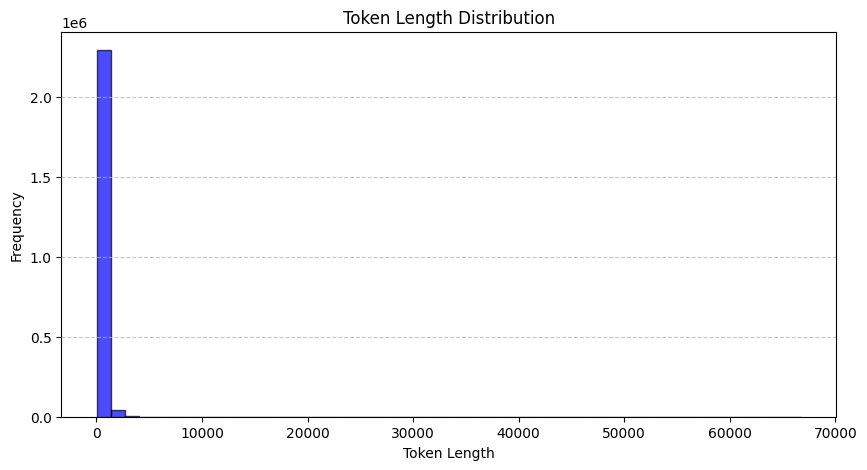

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(token_len, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.title("Token Length Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Spliting Data

In [25]:
from sklearn.model_selection import train_test_split
import glob, json, os
import random

random.seed(42)

files = glob.glob("./Processed_data/*")

def get_jsonl(file):
    data = []
    with open(file, 'r') as f:
        for sample in f:
            data.append(json.loads(sample))
    return data

def save_jsonl(data, path):
    with open(path, 'w') as f:
        for sample in data:
            json.dump(sample, f, ensure_ascii=False)
            f.write('\n')

for file in files:

    if "_test" in file:
        continue

    if file not in ["./Processed_data/crosssum_english_hindi.jsonl", "./Processed_data/crosssum_hindi_english.jsonl",
                    "./Processed_data/crosssum_hindi_hindi.jsonl", "./Processed_data/crosssum_english_english.jsonl",
                    "./Processed_data/flores.jsonl", "./Processed_data/mintaka.jsonl",
                    "./Processed_data/mldr.jsonl", "./Processed_data/mlqa.jsonl",
                    "./Processed_data/amazon_review.jsonl", "./Processed_data/squad.jsonl",
                    "./Processed_data/stackoverflow.jsonl"]:
        
        data = get_jsonl(file)
        random.shuffle(data)
        train, val = train_test_split(data, test_size=0.2)

        path = f"./training_data/{file.split('/')[-1].split('.')[0]}/"
        os.makedirs(path, exist_ok=True)

        save_jsonl(train, f"{path}train.jsonl")
        save_jsonl(val, f"{path}val.jsonl")
    else:
        data = get_jsonl(file)
        path = f"./training_data/{file.split('/')[-1].split('.')[0]}/"
        os.makedirs(path, exist_ok=True)
        save_jsonl(data, f"{path}train.jsonl")

        test_path = f".{file.split('.')[1]}_test.{file.split('.')[2]}"
        data = get_jsonl(test_path)
        save_jsonl(data, f"{path}val.jsonl")

### Final training

In [26]:
import glob
import json
import random
import os

train_files = glob.glob("./training_data/*/train.jsonl", recursive=True)
val_files = glob.glob("./training_data/*/val.jsonl", recursive=True)

train_data = []
val_data = []

exclude_files = ['sentiment_shete', 'sentiment_joshi', 'hinge', 'code_mixed', 'sentiment_review', 'abp_news', 'crosssum_english_english']
exclude_files = ['xnli', 'Wikireranking', 'samanantar_language_classification']
#exclude_files = ['samanantar_language_classification']

english_data_files = ['amazon_review', 'crosssum_english_english', 'eli5', 'squad']
#english_data_files = []

def save_jsonl(data, path):

    with open(path, 'w') as f:
        for sample in data:
            json.dump(sample, f, ensure_ascii=False)
            f.write('\n')

for file in train_files:

    if file.split('/')[2] in exclude_files:
        #print(file)
        continue
    print(file)

    if file.split('/')[2] in english_data_files:
        data = []
        with open(file, 'r') as f:
            for sample in f:
                data.append(json.loads(sample))
        length_of_data = len(data)
        train_data = train_data + data[:length_of_data//2]

    else:

        with open(file, 'r') as f:
            for sample in f:
                train_data.append(json.loads(sample))

for file in val_files:

    if file.split('/')[2] in exclude_files:
        continue

    with open(file, 'r') as f:
        for sample in f:
            val_data.append(json.loads(sample))


random.shuffle(train_data)
random.shuffle(val_data)

save_jsonl(train_data, "./new_training_data/train_data.jsonl")
save_jsonl(val_data, "./new_training_data/val_data.jsonl")

./training_data/mldr/train.jsonl
./training_data/amazon_review/train.jsonl
./training_data/indicqa/train.jsonl
./training_data/sentiment_joshi/train.jsonl
./training_data/eli5/train.jsonl
./training_data/wikireranking/train.jsonl
./training_data/convbtm/train.jsonl
./training_data/laser/train.jsonl
./training_data/mlqa/train.jsonl
./training_data/sentiment_shete/train.jsonl
./training_data/hinge/train.jsonl
./training_data/code_mixed/train.jsonl
./training_data/crosssum_english_english/train.jsonl
./training_data/massive/train.jsonl
./training_data/abp_news_classification/train.jsonl
./training_data/xnli_new/train.jsonl
./training_data/lince/train.jsonl
./training_data/squad/train.jsonl
./training_data/sentiment/train.jsonl
./training_data/mtop_intent/train.jsonl
./training_data/phinc/train.jsonl
./training_data/stackoverflow/train.jsonl
./training_data/crosssum_hindi_hindi/train.jsonl
./training_data/sentiment_review/train.jsonl
./training_data/discourse/train.jsonl
./training_data/fl

In [151]:
len(train_data)

658097

In [ ]:
659297

In [3]:
len(train_data)

807411

In [2]:
len(train_data)

815419

#### Generate Hard Negative

In [ ]:
from openai import OpenAI
import random
import time
import re
import json

def generate_query_for_article(sample):

    client = OpenAI(
        base_url="https://integrate.api.nvidia.com/v1",
        api_key="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"
    )
    
    system_message = """
        You are an AI assistant designed to generate challenging hard negative examples in the same language as the output. Your task is to produce exactly one concise and well-formed hard negative response that seems similar to the correct Output text, but is actually irrelevant for the given Input text. The hard negative should be misleading in a subtle way — close in topic or style, but not a valid answer. Make sure the grammar and vocabulary are correct. Wrap the hard negative inside ## markers like this: ## hard negative text ##*.**
    """
    
    try:
        completion = client.chat.completions.create(
            model="nvidia/llama-3.3-nemotron-super-49b-v1",
            messages=[
                {"role": "system", "content": system_message},
                {"role": "user", "content": f"Input Text: {sample['source']} \nOutput Text: {sample['target']} \nGenerate Hard Negative example: "}
            ],
            temperature=0.6,
            top_p=0.95,
            max_tokens=100,
            frequency_penalty=0,
            presence_penalty=0,
            stream=False
        )
    
    except Exception as e:
        print(f"Error: {e}")
        time.sleep(5)
        return generate_query_for_article(sample)
    
    return completion.choices[0].message.content.split("##")[1]

with open("./new_training_data/train_data.jsonl", "r") as f:
    data = []
    for sample in f:
        data.append(json.loads(sample))

for idx, sample in enumerate(data):
    
    data[idx]['hard_negative'] = generate_query_for_article(sample)
    data[idx]['hard_negative_flag'] = 1

    if idx%5000==0:
        print(f"Processed {idx} samples")
        with open("./new_training_data/train_data_with_hard_negative.jsonl", "w") as f:
            for sample in data:
                json.dump(sample, f, ensure_ascii=False)
                f.write('\n')

KeyboardInterrupt: 

### Get training data info

In [126]:
import os
import glob
import json
from collections import defaultdict
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("LingoIITGN/Ganga-2-1B")

In [128]:
Bitext_Mining = ['./training_data/crosssum_english_english/train.jsonl',
                 './training_data/crosssum_hindi_hindi/train.jsonl',
                 './training_data/crosssum_english_hindi/train.jsonl',
                 './training_data/crosssum_hindi_english/train.jsonl',
                 './training_data/flores/train.jsonl',
                 './training_data/laser/train.jsonl',
                 './training_data/mintaka/train.jsonl',
                 './training_data/phinc/train.jsonl']

Classification = ['./training_data/discourse/train.jsonl',
                  './training_data/massive/train.jsonl',
                  './training_data/sentiment_joshi/train.jsonl',
                  './training_data/sentiment_shete/train.jsonl',
                  './training_data/sentiment_review/train.jsonl',
                  './training_data/sentiment/train.jsonl',
                 './training_data/abp_news_classification/train.jsonl',
                 './training_data/amazon_review/train.jsonl'
                  ]

Retrieval = ['./training_data/abp_news/train.jsonl',
             './training_data/indicqa/train.jsonl',
             './training_data/mldr/train.jsonl',
             './training_data/mlqa/train.jsonl',
             './training_data/squad/train.jsonl',
             './training_data/stackoverflow/train.jsonl',
             './training_data/eli5/train.jsonl'
            ]

Translation = ['./training_data/code_mixed/train.jsonl',
               './training_data/hinge/train.jsonl',
                ]

In [129]:
task_dict = {}

for task in Bitext_Mining:
    task_dict[task] = "Bitext_Mining"

for task in Classification:
    task_dict[task] = "Classification"

for task in Retrieval:
    task_dict[task] = "Retrieval"

for task in Translation:
    task_dict[task] = "Translation"

In [131]:
file_to_task = {}
for task_type, files in task_dict.items():
    for fname in files:
        file_to_task[fname] = task_type

# Collect all .jsonl files
files = glob.glob("./training_data/*/train.jsonl", recursive=True)

summary = {
    "overall_total_tokens": 0,
    "overall_samples": 0,
    "task_type_summary": defaultdict(lambda: {
        "total_tokens": 0,
        "total_samples": 0,
        "max_token_length": 0,
        "min_token_length": float("inf")
    }),
    "file_summary": {}
}

for file in files:
    num_tokens = 0
    num_sample = 0
    max_length = 0
    min_length = float("inf")

    with open(file, 'r') as f:
        for line in f:
            sample = json.loads(line)
            source = sample['source']
            target = sample['target']
            token_len = len(tokenizer.encode(source)) + len(tokenizer.encode(target))
            
            num_tokens += token_len
            num_sample += 1
            max_length = max(max_length, token_len)
            min_length = min(min_length, token_len)
        
    #filename = os.path.basename(file)
    task_type = task_dict.get(file, "unknown")

    # Update task type summary
    task_data = summary["task_type_summary"][task_type]
    task_data["total_tokens"] += num_tokens
    task_data["total_samples"] += num_sample
    task_data["max_token_length"] = max(task_data["max_token_length"], max_length)
    task_data["min_token_length"] = min(task_data["min_token_length"], min_length)

    summary['file_summary'][file] = {
                        "task_type": task_type,
                        "total_samples": num_sample,
                        "total_tokens": num_tokens,
                        "max_token_length": max_length,
                        "min_token_length": min_length,
    }

    summary["overall_total_tokens"] += num_tokens
    summary["overall_samples"] += num_sample

# Convert defaultdict to dict for saving
summary["task_type_summary"] = dict(summary["task_type_summary"])

# Save to JSON
with open("training_data_stats.json", "w") as f:
    json.dump(summary, f, indent=2)

In [ ]:
from deepspeed.utils.zero_to_fp32 import convert_zero_checkpoint_to_fp32_state_dict

best_model_dir = "checkpoints/ganga-2-1b-embeddings-new-equall-finetune-final-3-mean-32-epoch-1/checkpoint-2000"
output_dir = "checkpoints/ganga-2-1b-embeddings-new-equall-finetune-final-3-mean-32-epoch-1/best_model"
convert_zero_checkpoint_to_fp32_state_dict(best_model_dir, output_dir)

Processing zero checkpoint 'checkpoints/ganga-2-1b-embeddings-full-mean-16/checkpoint-4489/global_step4489'


Loading checkpoint shards: 100%|██████████| 6/6 [00:00<00:00, 3138.27it/s]


Detected checkpoint of type zero stage ZeroStageEnum.weights, world_size: 6
Parsing checkpoint created by deepspeed==0.16.7


Gathering sharded weights: 100%|██████████| 146/146 [00:00<00:00, 1239612.11it/s]


Reconstructed Trainable fp32 state dict with 146 params 939591680 elements


Saving checkpoint shards: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


In [2]:
import torch
from ganga_modeling import EmbeddingModel
from transformers import AutoModel

output_dir = "checkpoints/ganga-2-1b-embeddings-new-equall-finetune-final-mean-32-epoch-1/best_model"
state_dict = torch.load(f"{output_dir}/pytorch_model.bin")

base_model = AutoModel.from_pretrained("LingoIITGN/Ganga-2-1B")
model2 = EmbeddingModel(base_model, 'mean')
model2.load_state_dict(state_dict)
model2.base_model.save_pretrained(output_dir)

### Finetune data

In [7]:
import os
import json
import random
from sklearn.model_selection import train_test_split

paths = ["./Processed_data/mtop_intent.jsonl",
         #"./Processed_data/samanantar_language_classification.jsonl",
         "./Processed_data/xnli_new.jsonl"]

finetuning_data = []

for path in paths:

    with open(path, 'r') as f:
        for sample in f:
            finetuning_data.append(json.loads(sample))

random.shuffle(finetuning_data)

train, test = train_test_split(finetuning_data, test_size=0.1)

os.makedirs("./new_training_data2", exist_ok=True)

with open("./new_training_data2/train_data.jsonl", "w") as f:

    for sample in train:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

with open("./new_training_data2/val_data.jsonl", "w") as f:

    for sample in test:
        json.dump(sample, f, ensure_ascii=False)
        f.write('\n')

In [8]:
len(train)

127998

In [3]:
with open("./new_training_data/train_data_with_hard_negative.jsonl", "r") as f:
    train_data = []
    for sample in f:
        train_data.append(json.loads(sample))

In [4]:
len(train_data)

807411